In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = r"C:\Users\AKIN-JOHNSON\Desktop\Workspace\housing\Real_Estate_Sales_2001-2020_GL.csv"
df = pd.read_csv(file)
df.sample(random_state=40, n=5)

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold
851526,17183,2017,5/10/2018,Monroe,471 WHEELER RD,195100,290000.0,0.672700,Single Family,Single Family,1
397929,50267,2005,5/1/2006,Simsbury,15 CAMILLE LN,232860,425000.0,0.547906,Nan,Nan,1
830696,160201,2016,8/21/2017,Stafford,5 WESTFORD RD,156870,190000.0,0.825632,Single Family,Single Family,1
977288,190896,2019,6/30/2020,Norwalk,9 MARK DR,378690,555000.0,0.682300,Two Family,Two Family,1
413161,60025,2006,12/11/2006,Goshen,342 W HYERDALE DR,186430,393000.0,0.474377,Single Family,Single Family,0


# Data Wrangling

In [4]:
# checking for duplicate
df.duplicated().sum()

0

In [5]:
# checking for missing values
df.isna().sum()

Serial Number       0
List Year           0
Date Recorded       0
Town                0
Address             0
Assessed Value      0
Sale Amount         0
Sales Ratio         0
Property Type       0
Residential Type    0
Years until sold    0
dtype: int64

In [6]:
# checking datatypes
df.dtypes

Serial Number         int64
List Year             int64
Date Recorded        object
Town                 object
Address              object
Assessed Value        int64
Sale Amount         float64
Sales Ratio         float64
Property Type        object
Residential Type     object
Years until sold      int64
dtype: object

In [7]:
df.head(6)

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold
0,2020348,2020,9/13/2021,Ansonia,230 WAKELEE AVE,150500,325000.0,0.4630,Commercial,Nan,1
1,20002,2020,10/2/2020,Ashford,390 TURNPIKE RD,253000,430000.0,0.5883,Residential,Single Family,0
2,200212,2020,3/9/2021,Avon,5 CHESTNUT DRIVE,130400,179900.0,0.7248,Residential,Condo,1
3,200243,2020,4/13/2021,Avon,111 NORTHINGTON DRIVE,619290,890000.0,0.6958,Residential,Single Family,1
4,200377,2020,7/2/2021,Avon,70 FAR HILLS DRIVE,862330,1447500.0,0.5957,Residential,Single Family,1
5,200109,2020,12/9/2020,Avon,57 FAR HILLS DRIVE,847520,1250000.0,0.6780,Residential,Single Family,0


In [8]:
# correcting datatypes
df['Date Recorded'] = pd.to_datetime(df['Date Recorded'])

# extract the year and the month
df['Month'] = df['Date Recorded'].dt.strftime('%b')
df['Year'] = df['Date Recorded'].dt.year


# correcting other datatypes
df['Sale Amount'] = df['Sale Amount'].astype('int64')

print(df.dtypes)
df.head()

Serial Number                int64
List Year                    int64
Date Recorded       datetime64[ns]
Town                        object
Address                     object
Assessed Value               int64
Sale Amount                  int64
Sales Ratio                float64
Property Type               object
Residential Type            object
Years until sold             int64
Month                       object
Year                         int32
dtype: object


,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold,Month,Year
0,2020348,2020,2021-09-13,Ansonia,230 WAKELEE AVE,150500,325000,0.4630,Commercial,Nan,1,Sep,2021
1,20002,2020,2020-10-02,Ashford,390 TURNPIKE RD,253000,430000,0.5883,Residential,Single Family,0,Oct,2020
2,200212,2020,2021-03-09,Avon,5 CHESTNUT DRIVE,130400,179900,0.7248,Residential,Condo,1,Mar,2021
3,200243,2020,2021-04-13,Avon,111 NORTHINGTON DRIVE,619290,890000,0.6958,Residential,Single Family,1,Apr,2021
4,200377,2020,2021-07-02,Avon,70 FAR HILLS DRIVE,862330,1447500,0.5957,Residential,Single Family,1,Jul,2021


In [9]:
# remane columns
df = df.rename(columns={'Year':'Date Recorded Year',
                       'Month':'Date Recorded Month'})
df.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold,Date Recorded Month,Date Recorded Year
0,2020348,2020,2021-09-13,Ansonia,230 WAKELEE AVE,150500,325000,0.4630,Commercial,Nan,1,Sep,2021
1,20002,2020,2020-10-02,Ashford,390 TURNPIKE RD,253000,430000,0.5883,Residential,Single Family,0,Oct,2020
2,200212,2020,2021-03-09,Avon,5 CHESTNUT DRIVE,130400,179900,0.7248,Residential,Condo,1,Mar,2021
3,200243,2020,2021-04-13,Avon,111 NORTHINGTON DRIVE,619290,890000,0.6958,Residential,Single Family,1,Apr,2021
4,200377,2020,2021-07-02,Avon,70 FAR HILLS DRIVE,862330,1447500,0.5957,Residential,Single Family,1,Jul,2021


In [10]:
# replace values 
df['Residential Type'] = df['Residential Type'].replace({'Nan':'Unknown'})
df['Town'] = df['Town'].replace({'***Unknown***':'Unknown'})
df['Property Type'] = df['Property Type'].replace({'Nan':'Unknown'})
df.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold,Date Recorded Month,Date Recorded Year
0,2020348,2020,2021-09-13,Ansonia,230 WAKELEE AVE,150500,325000,0.4630,Commercial,Unknown,1,Sep,2021
1,20002,2020,2020-10-02,Ashford,390 TURNPIKE RD,253000,430000,0.5883,Residential,Single Family,0,Oct,2020
2,200212,2020,2021-03-09,Avon,5 CHESTNUT DRIVE,130400,179900,0.7248,Residential,Condo,1,Mar,2021
3,200243,2020,2021-04-13,Avon,111 NORTHINGTON DRIVE,619290,890000,0.6958,Residential,Single Family,1,Apr,2021
4,200377,2020,2021-07-02,Avon,70 FAR HILLS DRIVE,862330,1447500,0.5957,Residential,Single Family,1,Jul,2021


In [11]:
# drop columns that arent neccessery
df = df.drop(columns=['Serial Number', 'Date Recorded', 'Address'])
df.head()

,List Year,Town,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold,Date Recorded Month,Date Recorded Year
0,2020,Ansonia,150500,325000,0.4630,Commercial,Unknown,1,Sep,2021
1,2020,Ashford,253000,430000,0.5883,Residential,Single Family,0,Oct,2020
2,2020,Avon,130400,179900,0.7248,Residential,Condo,1,Mar,2021
3,2020,Avon,619290,890000,0.6958,Residential,Single Family,1,Apr,2021
4,2020,Avon,862330,1447500,0.5957,Residential,Single Family,1,Jul,2021


In [12]:
df

,List Year,Town,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold,Date Recorded Month,Date Recorded Year
0,2020,Ansonia,150500,325000,0.463000,Commercial,Unknown,1,Sep,2021
1,2020,Ashford,253000,430000,0.588300,Residential,Single Family,0,Oct,2020
2,2020,Avon,130400,179900,0.724800,Residential,Condo,1,Mar,2021
3,2020,Avon,619290,890000,0.695800,Residential,Single Family,1,Apr,2021
4,2020,Avon,862330,1447500,0.595700,Residential,Single Family,1,Jul,2021
...,...,...,...,...,...,...,...,...,...,...
997208,2019,New London,60410,53100,1.137665,Single Family,Single Family,1,Jun,2020
997209,2019,Waterbury,68280,76000,0.898400,Single Family,Single Family,0,Nov,2019
997210,2019,Windsor Locks,121450,210000,0.578300,Single Family,Single Family,1,Apr,2020
997211,2019,Middletown,203360,280000,0.726300,Single Family,Single Family,1,Jun,2020


# Exploratory Data Analysis

In [14]:
# 1 - How have assessed values changed over time across different towns?
assessed_trend = df.groupby(['List Year', 'Town'])['Assessed Value'].sum().unstack()
assessed_trend
# assessed_trend.plot(kind='line', figsize=(10, 6), title='Average Assessed Value Over Years')
# plt.show()

Town,Andover,Ansonia,Ashford,Avon,Barkhamsted,Beacon Falls,Berlin,Bethany,Bethel,Bethlehem,...,Willington,Wilton,Winchester,Windham,Windsor,Windsor Locks,Wolcott,Woodbridge,Woodbury,Woodstock
List Year,,,,,,,,,,,,,,,,,,,,,
2001,NaN,33983604.0,10233435.0,102854690.0,7834860.0,NaN,55655690.0,26544400.0,54467934.0,8699138.0,...,11283430.0,108423840.0,23611151.0,NaN,69881340.0,21841700.0,NaN,38561320.0,41018835.0,19829226.0
2002,7668270.0,NaN,NaN,130654440.0,8501767.0,20169480.0,NaN,23891180.0,NaN,7585890.0,...,10585630.0,NaN,NaN,34562360.0,92934170.0,37803900.0,38526642.0,48917690.0,36277740.0,19753058.0
2003,5104200.0,34105880.0,9598810.0,NaN,NaN,18642020.0,42579030.0,NaN,76236470.0,NaN,...,60900.0,224614430.0,33939181.0,29632830.0,NaN,NaN,40694518.0,39038720.0,NaN,25428720.0
2004,7971400.0,40675550.0,12852100.0,166871650.0,10143310.0,15236256.0,78776080.0,26471370.0,82635380.0,14274502.0,...,15772250.0,225409260.0,43710770.0,40903030.0,124470520.0,50558400.0,38901246.0,NaN,60403510.0,30894810.0
2005,5240500.0,36339339.0,12516245.0,128548788.0,7840540.0,12670680.0,57687510.0,24983830.0,65408910.0,10091620.0,...,14949246.0,224665550.0,16059361.0,NaN,123355940.0,52337710.0,32279321.0,48680730.0,47378990.0,NaN
2006,NaN,28148057.0,9263770.0,119617060.0,9357840.0,NaN,179679150.0,21483900.0,55451623.0,10932250.0,...,8846060.0,167839980.0,25747466.0,33872950.0,112420330.0,49476400.0,NaN,63952930.0,45412840.0,29624620.0
2007,6798110.0,NaN,NaN,89436480.0,6125031.0,12315290.0,NaN,14012100.0,NaN,8138140.0,...,9113280.0,NaN,NaN,28826250.0,93997640.0,34086034.0,44121340.0,36412360.0,25340550.0,20906050.0
2008,5405130.0,24617770.0,10676840.0,13891250.0,NaN,13157250.0,115582583.0,NaN,64758420.0,NaN,...,NaN,116292514.0,18564090.0,33007900.0,97370.0,NaN,32086500.0,34576220.0,NaN,19573230.0
2009,6919700.0,23913400.0,11771850.0,96397000.0,6833580.0,13793950.0,89807590.0,13715110.0,92365910.0,9581320.0,...,7547250.0,158701850.0,28391145.0,29695570.0,56387120.0,23791070.0,33871350.0,NaN,34224610.0,24504530.0


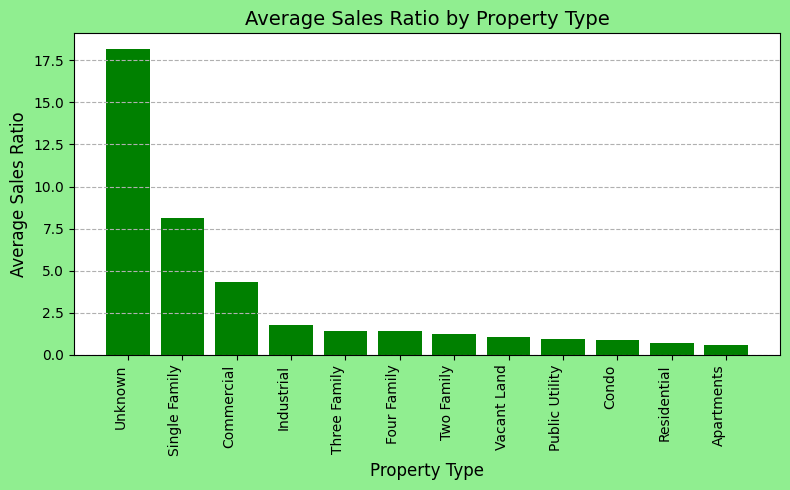

In [15]:
# 2 - How does the sales ratio vary by property type?

# Pivot table for sales ratio by property type
sales_ratio = df.pivot_table(index='Property Type', values='Sales Ratio', aggfunc='mean').sort_values(by='Sales Ratio', ascending=False)

# Plot the bar chart
plt.figure(figsize=(8, 5), facecolor='lightgreen')

# Bar chart
plt.bar(sales_ratio.index, sales_ratio['Sales Ratio'], color='green')

# Add labels and title
plt.title('Average Sales Ratio by Property Type', fontsize=14)
plt.xlabel('Property Type', fontsize=12)
plt.ylabel('Average Sales Ratio', fontsize=12)
plt.xticks(rotation=90, ha='right')
plt.grid(axis='y', ls='--')

# Show the plot
plt.tight_layout()
plt.show()

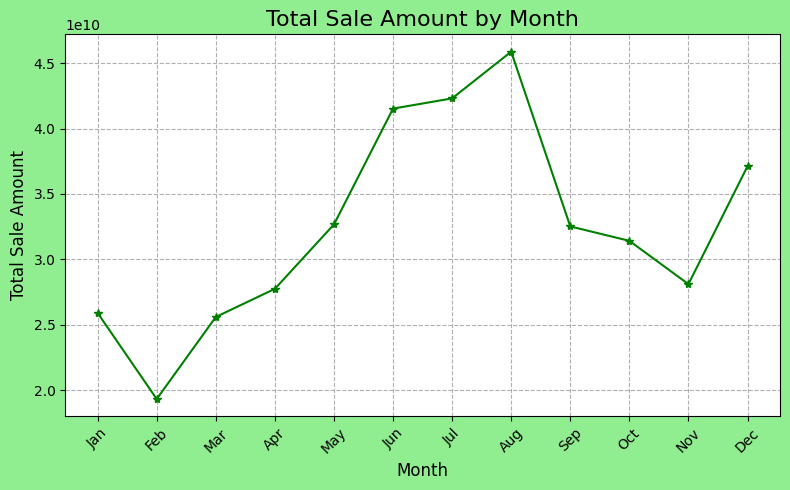

In [16]:
# 3a - Which months or years see the highest sale amounts recorded?
highest_month_sales = df.groupby('Date Recorded Month')['Sale Amount'].sum()
highest_month_sales

# Define the correct chronological order for the months
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Reindex the Series using the categorical order
highest_month_sales.index = pd.Categorical(highest_month_sales.index, categories=month_order, ordered=True)
highest_month_sales = highest_month_sales.sort_index()

# Plot the data
plt.figure(figsize=(8, 5), facecolor='lightgreen')
plt.plot(highest_month_sales.index, highest_month_sales.values, color='green', marker='*')
plt.title('Total Sale Amount by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sale Amount', fontsize=12)
plt.grid(ls='--')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


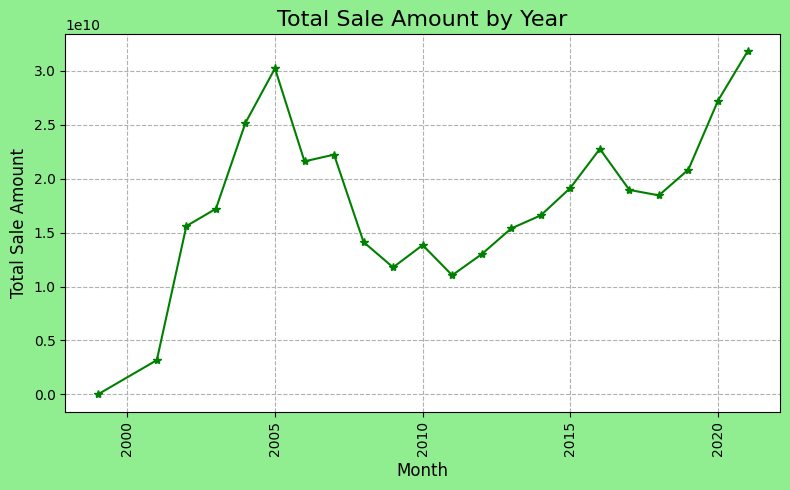

In [17]:
# 3b - Which months or years see the highest sale amounts recorded?
highest_year_sales = df.groupby('Date Recorded Year')['Sale Amount'].sum()
highest_year_sales

# Plot the data
plt.figure(figsize=(8, 5), facecolor='lightgreen')
plt.plot(highest_year_sales.index, highest_year_sales.values, color='green', marker='*')
plt.title('Total Sale Amount by Year', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sale Amount', fontsize=12)
plt.grid(ls='--')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


                  Assessed Value   Sale Amount
Residential Type                              
Single Family       124155233412  178358102120
Unknown             124929389454  169291649840
Condo                22428786676   32653798286
Two Family            4495075793    6127753256
Three Family          1911722377    2868236368
Four Family            445484279     761505232


<Figure size 1000x600 with 0 Axes>

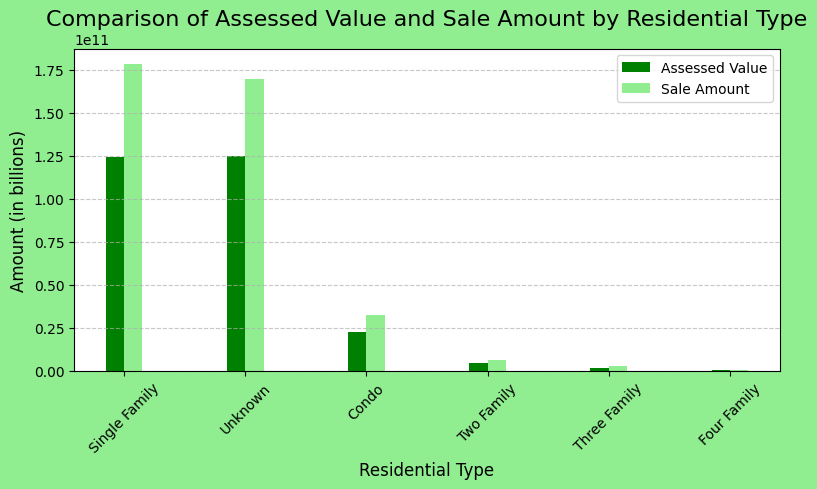

In [18]:
# 4 - Which residential types tend to have the highest assessed values and sales amounts?
residential_types = df.groupby('Residential Type')[['Assessed Value', 'Sale Amount']].sum()
residential_types = residential_types.sort_values(by='Sale Amount', ascending=False)  # Sort for better visualization
print(residential_types)

# Set up figure size
plt.figure(figsize=(10, 6))

# Bar width and x-axis positions
bar_width = 0.15
x = np.arange(len(residential_types.index))

plt.figure(figsize=(8, 5), facecolor='lightgreen')

# Plot the data
plt.bar(x - bar_width/2, residential_types['Assessed Value'], width=bar_width, label='Assessed Value', color='green')
plt.bar(x + bar_width/2, residential_types['Sale Amount'], width=bar_width, label='Sale Amount', color='lightgreen')

# Add labels, title, and legend
plt.title('Comparison of Assessed Value and Sale Amount by Residential Type', fontsize=16)
plt.xlabel('Residential Type', fontsize=12)
plt.ylabel('Amount (in billions)', fontsize=12)
plt.xticks(x, labels=residential_types.index, rotation=45, fontsize=10)
plt.legend(fontsize=10)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Optimize layout
plt.tight_layout()

# Show the plot
plt.show()


              Assessed Value    Sale Amount
Town                                       
Avon           296089.470053  463161.042965
Bethel         236878.918364  351668.274026
Bethany        199569.300743  299251.345916
Berlin         224096.133971  289027.232146
Bethlehem      180299.481982  288212.458333
Beacon Falls   140744.101587  277363.969841
Andover        135509.505062  220091.487064
Barkhamsted    139741.108738  219001.805825
Ashford        124774.592058  206041.622383
Ansonia        130581.124409  202463.559730


<Figure size 1000x600 with 0 Axes>

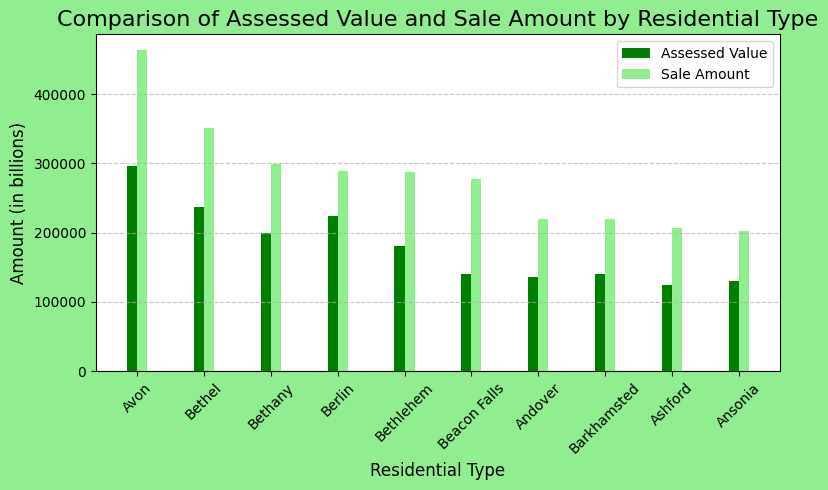

In [19]:
# 5 - Are there significant differences in average sales amounts and average assessed values between towns?

# we will get the top 10 because its too much data
town_types = df.groupby('Town')[['Assessed Value', 'Sale Amount']].mean()
town_types = town_types.head(10).sort_values(by='Sale Amount', ascending=False)  # Sort for better visualization
print(town_types)

# Set up figure size
plt.figure(figsize=(10, 6))

# Bar width and x-axis positions
bar_width = 0.15
x = np.arange(len(town_types.index))

plt.figure(figsize=(8, 5), facecolor='lightgreen')

# Plot the data
plt.bar(x - bar_width/2, town_types['Assessed Value'], width=bar_width, label='Assessed Value', color='green')
plt.bar(x + bar_width/2, town_types['Sale Amount'], width=bar_width, label='Sale Amount', color='lightgreen')

# Add labels, title, and legend
plt.title('Comparison of Assessed Value and Sale Amount by Residential Type', fontsize=16)
plt.xlabel('Residential Type', fontsize=12)
plt.ylabel('Amount (in billions)', fontsize=12)
plt.xticks(x, labels=town_types.index, rotation=45, fontsize=10)
plt.legend(fontsize=10)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Optimize layout
plt.tight_layout()

# Show the plot
plt.show()

# 5b - Which towns have the highest and lowest sales ratios, and why?

In [20]:
df.head(1)

,List Year,Town,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold,Date Recorded Month,Date Recorded Year
0,2020,Ansonia,150500,325000,0.463,Commercial,Unknown,1,Sep,2021


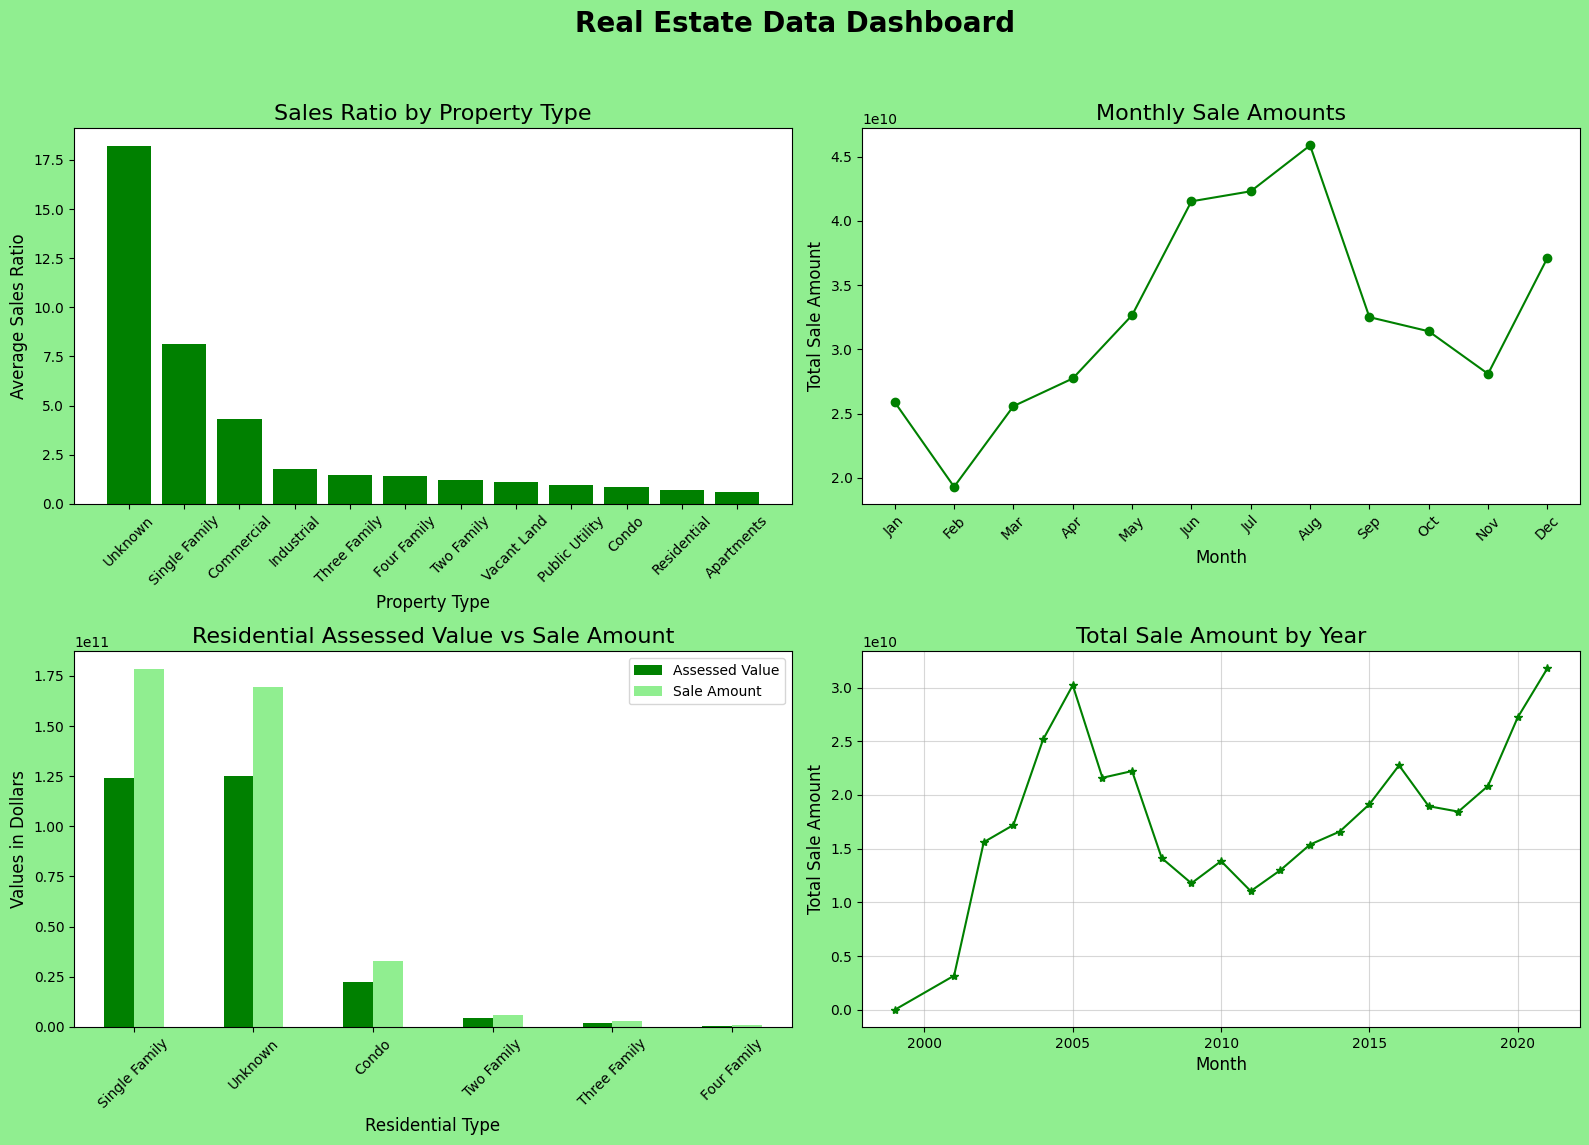

In [21]:
# Set up the figure and axes for the dashboard
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Real Estate Data Dashboard', fontsize=20, fontweight='bold')

# Set the background color for the entire figure
fig.patch.set_facecolor('lightgreen')

# Bar chart: Sales Ratio by Property Type
axes[0, 0].bar(sales_ratio.index, sales_ratio['Sales Ratio'], color='green')
axes[0, 0].set_title('Sales Ratio by Property Type', fontsize=16)
axes[0, 0].set_xlabel('Property Type', fontsize=12)
axes[0, 0].set_ylabel('Average Sales Ratio', fontsize=12)
axes[0, 0].tick_params(axis='x', rotation=45)

# Line chart: Monthly Sale Amounts
axes[0, 1].plot(highest_month_sales.index, highest_month_sales.values, marker='o', color='green')
axes[0, 1].set_title('Monthly Sale Amounts', fontsize=16)
axes[0, 1].set_xlabel('Month', fontsize=12)
axes[0, 1].set_ylabel('Total Sale Amount', fontsize=12)
axes[0, 1].tick_params(axis='x', rotation=45)

# Stacked bar chart: Residential Types Assessed Value vs Sale Amount
residential_types.plot(kind='bar', stacked=False, ax=axes[1, 0], color=['green', 'lightgreen'])
axes[1, 0].set_title('Residential Assessed Value vs Sale Amount', fontsize=16)
axes[1, 0].set_xlabel('Residential Type', fontsize=12)
axes[1, 0].set_ylabel('Values in Dollars', fontsize=12)
axes[1, 0].legend(['Assessed Value', 'Sale Amount'])
axes[1, 0].tick_params(axis='x', rotation=45)

# Scatterplot: Correlation of Years Until Sold vs Sale Amount
axes[1, 1].plot(highest_year_sales.index, highest_year_sales.values, color='green', marker='*')
axes[1, 1].set_title('Total Sale Amount by Year', fontsize=16)
axes[1, 1].set_xlabel('Month', fontsize=12)
axes[1, 1].set_ylabel('Total Sale Amount', fontsize=12)
axes[1, 1].grid(alpha=0.5)

# Adjust layout and show the dashboard
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Leave space for the main title
plt.show()

# Machine Learning

In [23]:
df.head()

,List Year,Town,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold,Date Recorded Month,Date Recorded Year
0,2020,Ansonia,150500,325000,0.4630,Commercial,Unknown,1,Sep,2021
1,2020,Ashford,253000,430000,0.5883,Residential,Single Family,0,Oct,2020
2,2020,Avon,130400,179900,0.7248,Residential,Condo,1,Mar,2021
3,2020,Avon,619290,890000,0.6958,Residential,Single Family,1,Apr,2021
4,2020,Avon,862330,1447500,0.5957,Residential,Single Family,1,Jul,2021


In [24]:
# import necessary libraries for machine learning
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score

In [25]:
# use labelEncoder for categorical variable

# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each column individually
categorical_columns = ['Town', 'Property Type', 'Residential Type']
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

In [26]:
df.head()

,List Year,Town,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold,Date Recorded Month,Date Recorded Year
0,2020,1,150500,325000,0.4630,1,5,1,Sep,2021
1,2020,2,253000,430000,0.5883,6,2,0,Oct,2020
2,2020,3,130400,179900,0.7248,6,0,1,Mar,2021
3,2020,3,619290,890000,0.6958,6,2,1,Apr,2021
4,2020,3,862330,1447500,0.5957,6,2,1,Jul,2021


In [27]:
# drop redundant columns
df = df.drop(columns=['Date Recorded Month', 'Years until sold'], axis=1)
df.head()

,List Year,Town,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Date Recorded Year
0,2020,1,150500,325000,0.4630,1,5,2021
1,2020,2,253000,430000,0.5883,6,2,2020
2,2020,3,130400,179900,0.7248,6,0,2021
3,2020,3,619290,890000,0.6958,6,2,2021
4,2020,3,862330,1447500,0.5957,6,2,2021


In [28]:
# split data into features and target
X = df.drop('Sale Amount', axis=1)
y = df['Sale Amount']

# split into traimimg and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40, shuffle=True)

# print the shapes of the splits
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(797770, 7) (797770,)
(199443, 7) (199443,)


In [29]:
# create a dictionary that carries the models 
models = {'Linear Regression':LinearRegression(),
         'Decision Tree': DecisionTreeRegressor(random_state=40),
         'Random Forest': RandomForestRegressor(random_state=40)
         }

results = []
# use a loop to train these models
for model_name, model in models.items():
    # train the model
    model.fit(X_train, y_train)

    # predict the model
    y_test_pred = model.predict(X_test)

    # Evaluale the models
    mae = mean_absolute_error(y_test, y_test_pred)
    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    
    # print result
    print(f'The Mean Absolute Error for {model_name} = {mae:.2f}')
    print(f'The Mean Squared Error for {model_name} = {mse:.2f}')
    print(f'The R2_score for {model_name} = {r2:.2f}')
    print('-' * 80)
    
    # store the result inside a dataframe
    results.append({'Model': model_name, 'MAE': mae, 'MSE': mse, 'R2_Score':r2})

results_df = pd.DataFrame(results)
results_df

The Mean Absolute Error for Linear Regression = 275590.32
The Mean Squared Error for Linear Regression = 2242622249597.79
The R2_score for Linear Regression = 0.12
--------------------------------------------------------------------------------
The Mean Absolute Error for Decision Tree = 13375.38
The Mean Squared Error for Decision Tree = 1488086917783.08
The R2_score for Decision Tree = 0.42
--------------------------------------------------------------------------------
The Mean Absolute Error for Random Forest = 10433.73
The Mean Squared Error for Random Forest = 845386642879.52
The R2_score for Random Forest = 0.67
--------------------------------------------------------------------------------


,Model,MAE,MSE,R2_Score
0,Linear Regression,275590.316413,2.242622e+12,0.119847
1,Decision Tree,13375.381722,1.488087e+12,0.415977
2,Random Forest,10433.726683,8.453866e+11,0.668215


In [ ]:
# performing hyperparameter tuning for random forest
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [6, 8, 10],
    'min_samples_leaf': [2, 4, 6],
    'bootstrap': [True, False]
}

rfr = RandomForestRegressor(random_state=40)
random_search = RandomizedSearchCV(estimator=rfr, param_distributions=param_dist, n_iter=100, cv=5, verbose=2, n_jobs=-1, scoring='neg_mean_squared_error', random_state=40)
random_search.fit(X_train, y_train)

# Best parameters and evaluation
best_random_model = random_search.best_estimator_

y_pred_random = best_random_model.predict(X_test)

mae_random = mean_absolute_error(y_test, y_pred_random)
mse_random = mean_squared_error(y_test, y_pred_random)
r2_random = r2_score(y_test, y_pred_random)

print(f"Best Hyperparameters (RandomizedSearchCV): {random_search.best_params_}")
print(f"Mean Absolute Error (RandomizedSearchCV): {mae_random:.2f}")
print(f"Mean Squared Error (RandomizedSearchCV): {mse_random:.2f}")
print(f"R2 Score (RandomizedSearchCV): {r2_random:.2f}")


Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [ ]:
random_search

In [ ]:
# using cross validation

# Define the MAE scoring metric
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Initialize the Random Forest Regressor
model = RandomForestRegressor(random_state=40)

# Perform cross-validation for MAE
mae_scores = -cross_val_score(model, X, y, cv=5, scoring=mae_scorer)

# Calculate the mean and standard deviation of MAE scores
mean_mae = mae_scores.mean()
std_mae = mae_scores.std()

# Print results
print(f"Cross-Validation Mean MAE: {mean_mae:.2f}")
print(f"Cross-Validation Standard Deviation of MAE: {std_mae:.2f}")

In [ ]:
# Data preparation for the bar chart
metrics = ['MAE', 'MSE', 'R2']
x = np.arange(len(cv_results_df['Model']))  # the label locations
width = 0.25  # the width of the bars

# Plot bars for each metric
fig, ax = plt.subplots(figsize=(10, 6))

# Bars for each metric
for i, metric in enumerate(metrics):
    ax.bar(x + i * width, cv_results_df[metric], width, label=metric)

# Customize the plot
ax.set_title('Model Performance Comparison')
ax.set_xlabel('Models')
ax.set_ylabel('Metric Values')
ax.set_xticks(x + width)
ax.set_xticklabels(cv_results_df['Model'])
ax.legend()

# Display the plot
plt.show()